In [7]:
import numpy as np
import matplotlib.pyplot as plt

[[1.  0.8]
 [0.8 1. ]]
[[0.99365555 0.80401054]
 [0.80401054 0.99051123]]


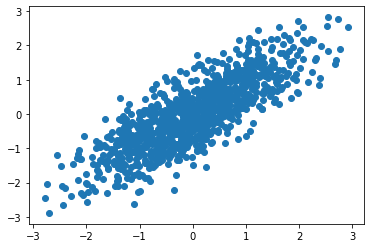

In [50]:
cov = np.array([1, .8, .8, 1]).reshape(2,2)
print(cov)
L = np.linalg.cholesky(cov)
X = np.matmul(np.random.normal(0, 1, size=(1000, 2)), L.T)
n = len(X[:])
plt.scatter(X[:,0], X[:,1])

corr = 1/n * np.matmul(X.T, X)
print(corr)

1.7960954676396172
[0.70779778 0.70641511]
[0.70779778 0.70641511]


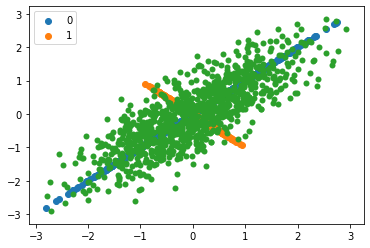

In [122]:
e, v = np.linalg.eig(corr)
print(e[0])
print(v[:,0])
print(np.sqrt(ev_1*ev_1))
def project(X, v, j):
    proj = np.matmul(X, v)
    res = np.array([v * proj[i] for i in range(n)])
    plt.scatter(res[:,0], res[:,1], label=j)
project(X, v[:,0], 0)
project(X, v[:,1], 1)
plt.legend()
plt.scatter(X[:,0], X[:,1], marker='o', linewidth=.001)

In [1]:
x = X[0]
print(x)
print(np.dot(x, v[:,0])*v[:,0])
print(np.dot(x, v[:,0])*v[:,0] + np.dot(x, v[:,1])*v[:,1])

NameError: name 'X' is not defined

In [5]:
l = [i for i in range(10)]
l[:-1]

[0, 1, 2, 3, 4, 5, 6, 7, 8]